<a href="https://colab.research.google.com/github/alexloaeza12/Simulaci-n-I/blob/main/Integraci%C3%B3n_MC_a_entregar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de integración MC

---




## Parte 1: Definir la Función a Integrar

In [6]:
# Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función a integrar
def f(x):
    return np.sqrt(np.arctan(x))

# Parámetros
a, b = 0, 1
n = 1000


La función a integrar es \( \sqrt{\arctan(x)} \). Esta función se definió utilizando `numpy` para manejar los cálculos matemáticos.


## Parte 2: Método de Monte Carlo por Media Muestral

In [7]:
# Método de Monte Carlo por Media Muestral
def monte_carlo_media_muestral(f, a, b, n):
    x = np.random.uniform(a, b, n)
    integral = (b - a) * np.mean(f(x))
    error = (b - a) * np.std(f(x)) / np.sqrt(n)
    intervalo_confianza = (integral - 1.96 * error, integral + 1.96 * error)
    return integral, error, intervalo_confianza

# Calculamos la integral usando el método de Media Muestral
integral_media_muestral, error_media_muestral, intervalo_media_muestral = monte_carlo_media_muestral(f, a, b, n)
print(f'Integral estimada por Media Muestral: {integral_media_muestral} ± {error_media_muestral}')
print(f'Intervalo de confianza por Media Muestral: {intervalo_media_muestral}')


Integral estimada por Media Muestral: 0.6301834259044659 ± 0.0064941599792676455
Intervalo de confianza por Media Muestral: (0.6174548723451013, 0.6429119794638304)


Este método consiste en generar una muestra de números aleatorios uniformemente distribuidos en el intervalo
[
𝑎
,
𝑏
]
[a,b]. La integral se estima como el promedio de la función evaluada en estos puntos, multiplicado por el tamaño del intervalo. Se calcula también el error estándar y el intervalo de confianza del 95%.

## Parte 3: Método de Monte Carlo por Acierto y Error

In [8]:
# Método de Monte Carlo por Acierto y Error
def monte_carlo_acierto_error(f, a, b, n, c):
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(0, c, n)
    under_curve = y < f(x)
    integral = c * (b - a) * np.mean(under_curve)
    error = c * (b - a) * np.std(under_curve) / np.sqrt(n)
    intervalo_confianza = (integral - 1.96 * error, integral + 1.96 * error)
    return integral, error, intervalo_confianza

# Parámetros
c = 1

# Calculamos la integral usando el método de Acierto y Error
integral_acierto_error, error_acierto_error, intervalo_acierto_error = monte_carlo_acierto_error(f, a, b, n, c)
print(f'Integral estimada por Acierto y Error: {integral_acierto_error} ± {error_acierto_error}')
print(f'Intervalo de confianza por Acierto y Error: {intervalo_acierto_error}')


Integral estimada por Acierto y Error: 0.639 ± 0.015188120357700619
Intervalo de confianza por Acierto y Error: (0.6092312840989068, 0.6687687159010932)


Este método interpreta la integral como el área bajo la curva en una región rectangular. Se generan puntos aleatorios en el rectángulo y se cuenta la fracción de puntos que caen bajo la curva. La integral se estima como esta fracción multiplicada por el área del rectángulo. También se calcula el error estándar y el intervalo de confianza del 95%.

## Parte 4: Comparación de Resultados y Gráficas

n = 1000
Integral estimada por Media Muestral: 0.6212328180945647 ± 0.006546405731551083
Intervalo de confianza por Media Muestral: (0.6084018628607245, 0.6340637733284048)
Integral estimada por Acierto y Error: 0.642 ± 0.015160343004035234
Intervalo de confianza por Acierto y Error: (0.612285727712091, 0.671714272287909)

n = 10000
Integral estimada por Media Muestral: 0.631908031308171 ± 0.002051807809726057
Intervalo de confianza por Media Muestral: (0.6278864880011079, 0.635929574615234)
Integral estimada por Acierto y Error: 0.6281 ± 0.004833118972257976
Intervalo de confianza por Acierto y Error: (0.6186270868143744, 0.6375729131856256)

n = 100000
Integral estimada por Media Muestral: 0.6286947343429299 ± 0.0006494762870259289
Intervalo de confianza por Media Muestral: (0.627421760820359, 0.6299677078655007)
Integral estimada por Acierto y Error: 0.62963 ± 0.0015270758432376565
Intervalo de confianza por Acierto y Error: (0.6266369313472542, 0.6326230686527459)



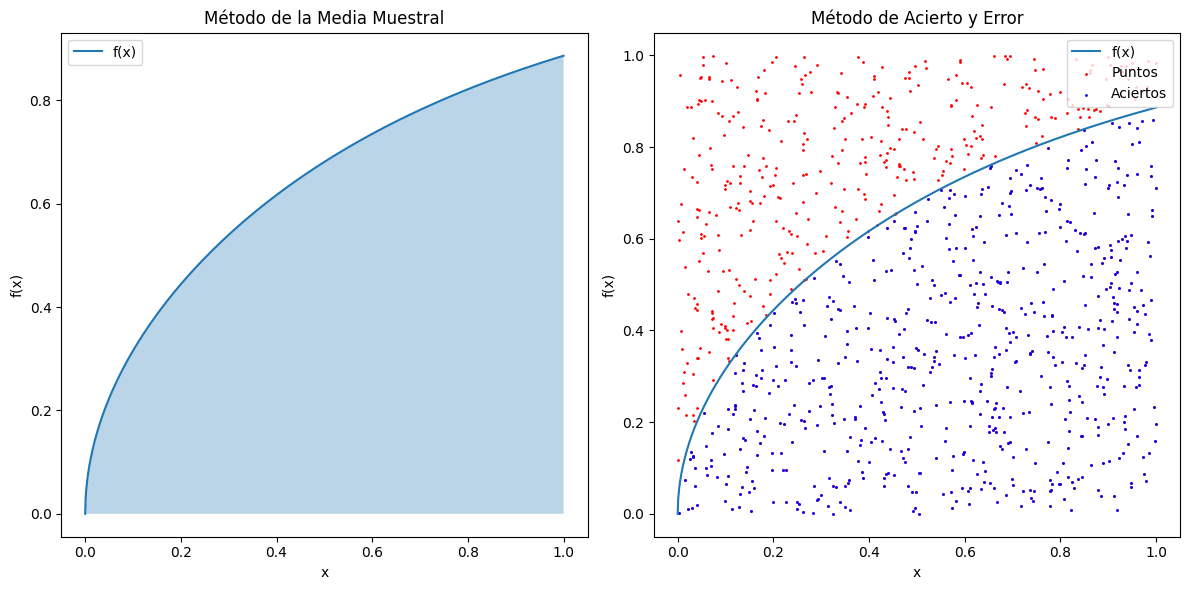

In [9]:
# Comparación de Resultados
resultados = []

n_values = [1000, 10000, 100000]
for n in n_values:
    integral_media_muestral, error_media_muestral, intervalo_media_muestral = monte_carlo_media_muestral(f, a, b, n)
    integral_acierto_error, error_acierto_error, intervalo_acierto_error = monte_carlo_acierto_error(f, a, b, n, c)
    resultados.append((n, integral_media_muestral, error_media_muestral, intervalo_media_muestral,
                       integral_acierto_error, error_acierto_error, intervalo_acierto_error))

for res in resultados:
    n, integral_mm, error_mm, intervalo_mm, integral_ae, error_ae, intervalo_ae = res
    print(f'n = {n}')
    print(f'Integral estimada por Media Muestral: {integral_mm} ± {error_mm}')
    print(f'Intervalo de confianza por Media Muestral: {intervalo_mm}')
    print(f'Integral estimada por Acierto y Error: {integral_ae} ± {error_ae}')
    print(f'Intervalo de confianza por Acierto y Error: {intervalo_ae}')
    print()

# Gráficas para ambos métodos
x = np.linspace(a, b, 1000)
y = f(x)

plt.figure(figsize=(12, 6))

# Gráfica del método de la Media Muestral
plt.subplot(1, 2, 1)
plt.plot(x, y, label='f(x)')
plt.title('Método de la Media Muestral')
plt.fill_between(x, y, alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Gráfica del método de Acierto y Error
plt.subplot(1, 2, 2)
plt.plot(x, y, label='f(x)')
x_points = np.random.uniform(a, b, 1000)
y_points = np.random.uniform(0, c, 1000)
plt.scatter(x_points, y_points, color='red', s=1, label='Puntos')
plt.scatter(x_points[y_points < f(x_points)], y_points[y_points < f(x_points)], color='blue', s=1, label='Aciertos')
plt.title('Método de Acierto y Error')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()


**Comparación de Resultados**

Se presentan los resultados para tres tamaños de muestra diferentes (
𝑛
=
1000
n=1000,
𝑛
=
10000
n=10000,
𝑛
=
100000
n=100000). Para cada tamaño de muestra, se muestran la estimación de la integral, el error estándar y el intervalo de confianza para ambos métodos.

**Gráficas**

Las gráficas muestran la función
arctan
⁡
(
𝑥
)
arctan(x)
​
  y las áreas bajo la curva para los dos métodos. Estas gráficas ayudan a visualizar el comportamiento de los métodos y la precisión de las estimaciones.